#Stroke Prediction 
### Using the Stroke Prediction Dataset from Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
Author: Georgia Kopalidi <br>
Notebook Developed as part of Masters' thesis project 

#Imports

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, f1_score, roc_auc_score

#Loading Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/MSc/Data/StrokePrediction/strokeData.csv')

# Data Analysis 

An exploratory data analysis is carried to identify useful features among the dataset, as well as any correlations. 

In [3]:
display(df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.shape

(5110, 12)

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 NA values under the bmi category. <br>
Instead of removing all rows including NA values (and risking the removal of useful data), <br> these NA values can be replaced with the mean value of the bmi column.

In [7]:
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(), inplace=True)

In [8]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Visualising the data

Seaborn plots are created to visualise the distribution of values for each data column - type.

In [10]:
sns.set_theme(style="white")
sns.set(rc={'figure.figsize':(13,10)})

**Age**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


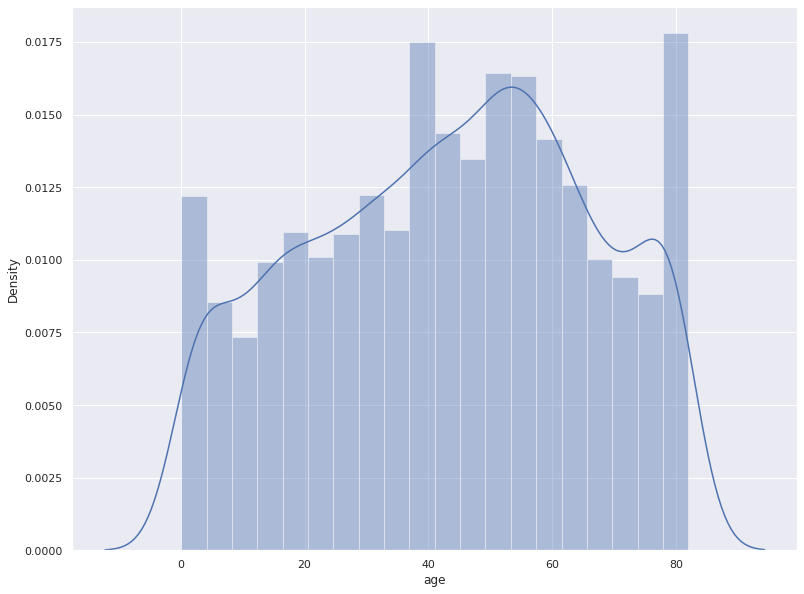

In [12]:
ax = sns.distplot(df.age, label="Age", kde= True)
plt.show()

**Gender**

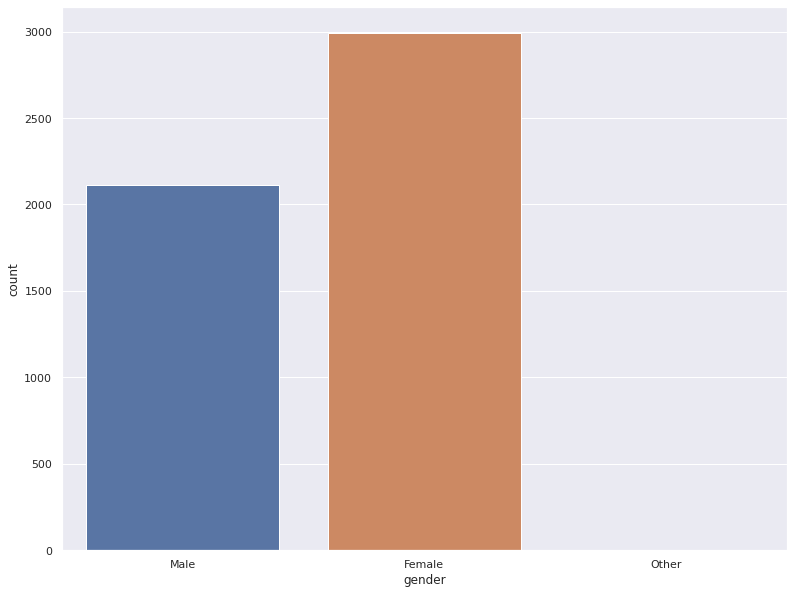

In [13]:
ax = sns.countplot(data=df, x="gender")
plt.show()

**Whether they have hypertension or not**

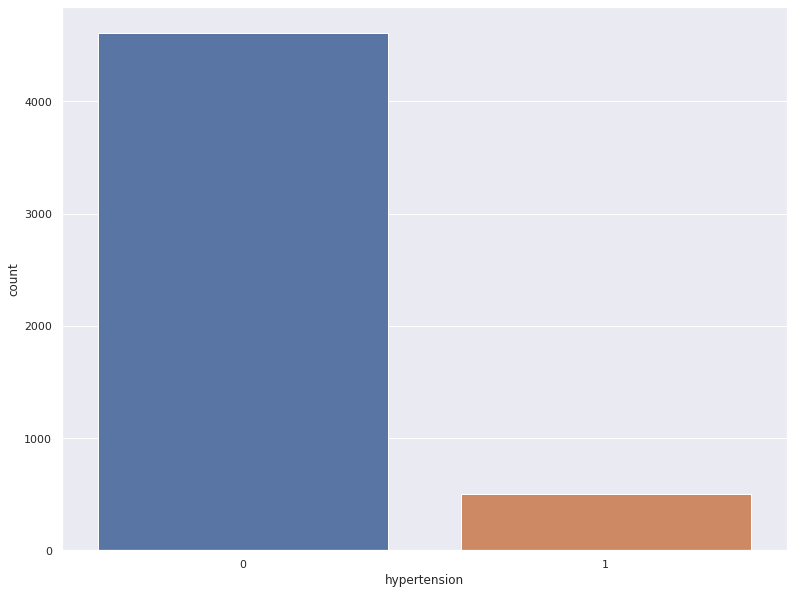

In [14]:
ax = sns.countplot(data=df, x="hypertension")
plt.show()

**Marital Status**

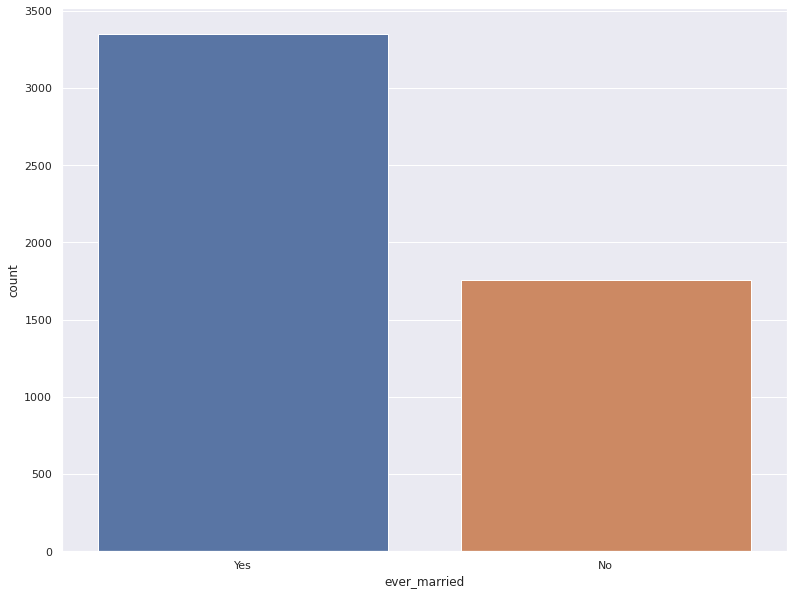

In [15]:
ax = sns.countplot(data=df, x="ever_married")
plt.show()

**Type of work**

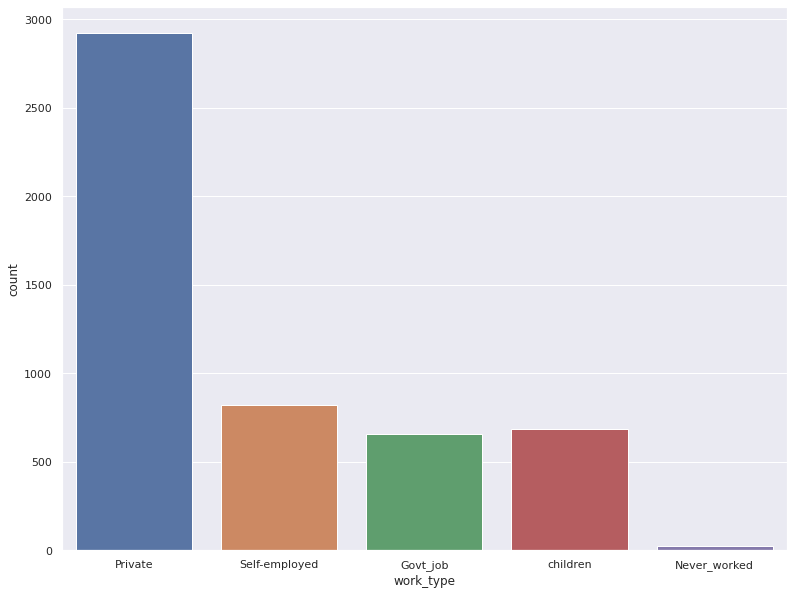

In [16]:
ax = sns.countplot(data=df, x="work_type")
plt.show()

**Type of residency**

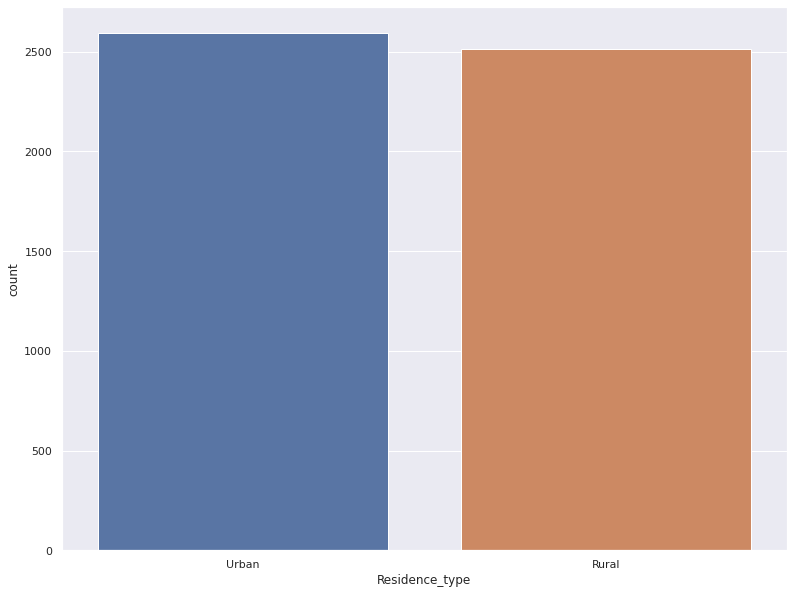

In [17]:
ax = sns.countplot(data=df, x="Residence_type")
plt.show()

**Smoking Status**

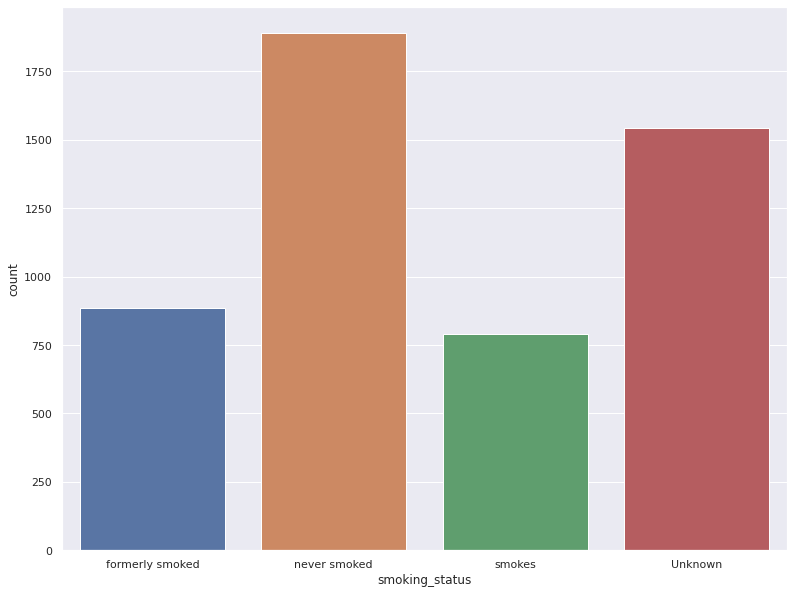

In [18]:
ax = sns.countplot(data=df, x="smoking_status")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


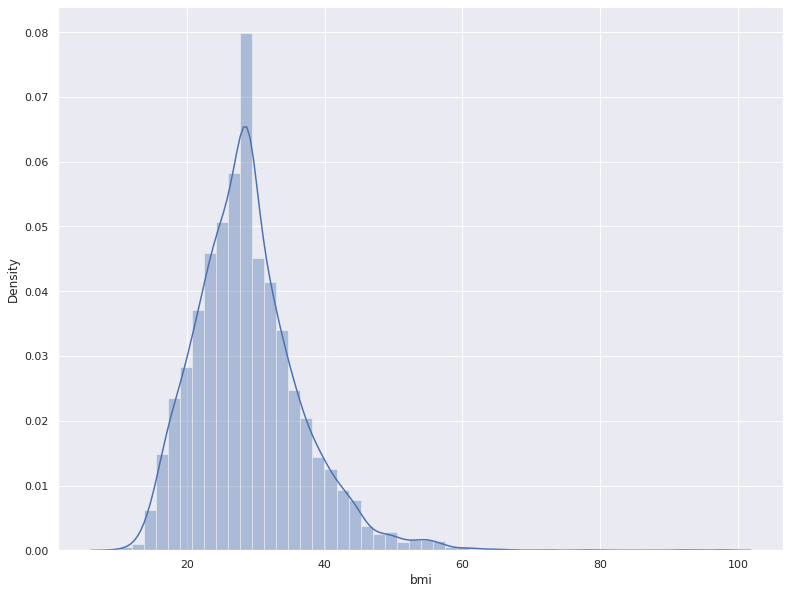

In [19]:
ax = sns.distplot(df.bmi, label="bmi", kde= True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


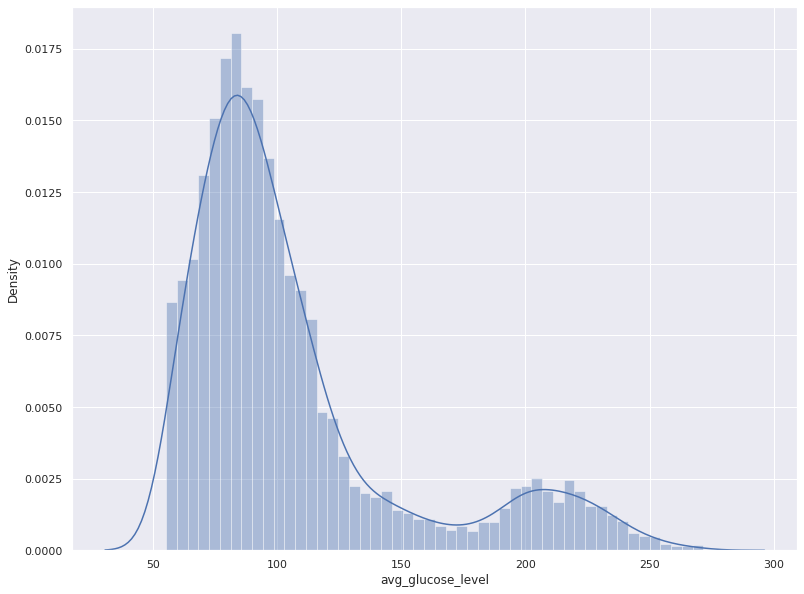

In [20]:
ax = sns.distplot(df.avg_glucose_level, label="Average Glucose", kde= True)
plt.show()

**If they had a stroke or not**

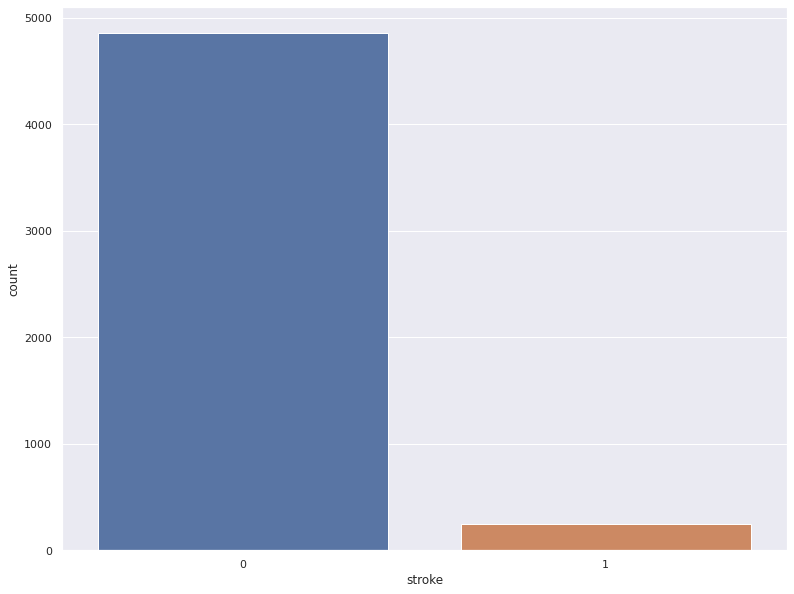

In [21]:
ax = sns.countplot(data=df, x="stroke")
plt.show()

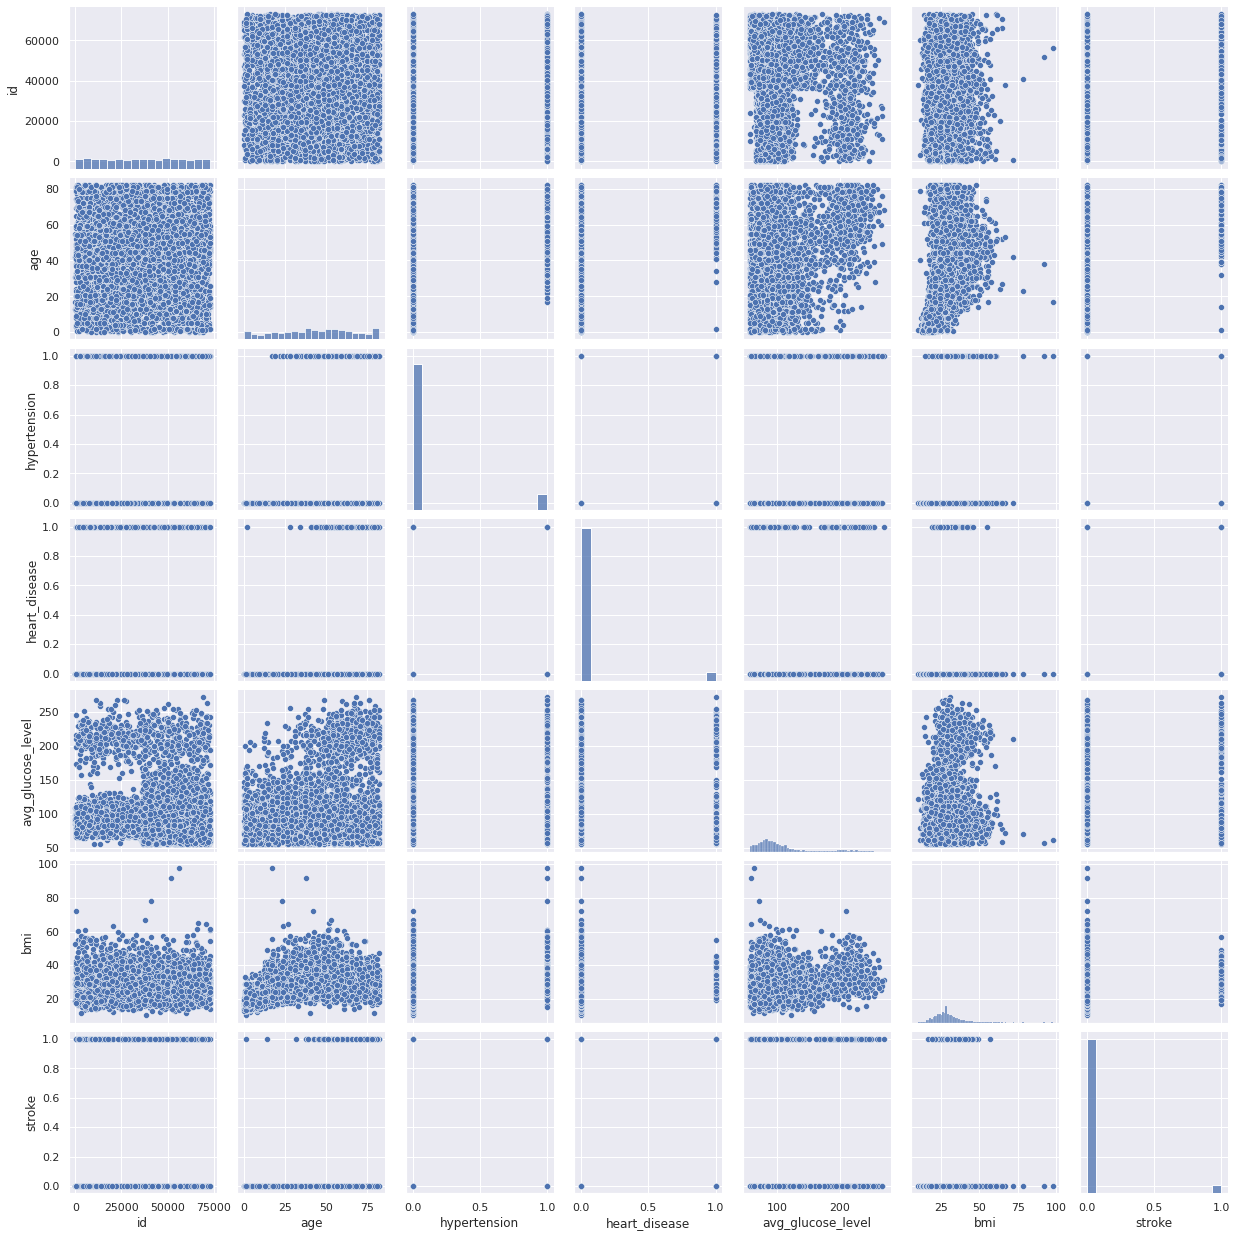

In [22]:
ax = sns.pairplot(df)
plt.show()

# Pre-Process

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
cat_encoding = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0,5,9])], remainder= 'passthrough')
x = np.array(cat_encoding.fit_transform(x))

In [ ]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
l_e = LabelEncoder()
x[:, 15] = l_e.fit_transform(x[:, 15])
x[:, 16] = l_e.fit_transform(x[:, 16])

In [ ]:
print(x)

[[0.0 1.0 0.0 ... 1 228.69 36.6]
 [1.0 0.0 0.0 ... 0 202.21 28.893236911794666]
 [0.0 1.0 0.0 ... 0 105.92 32.5]
 ...
 [1.0 0.0 0.0 ... 0 82.99 30.6]
 [0.0 1.0 0.0 ... 0 166.29 25.6]
 [1.0 0.0 0.0 ... 1 85.28 26.2]]


In [ ]:
print(y)

[1 1 1 ... 0 0 0]


In [ ]:
x.shape

(5110, 19)

In [ ]:
y.shape

(5110,)

# Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [25]:
gender = le.fit_transform(df['gender'])
ever_married = le.fit_transform(df['ever_married'])
work_type = le.fit_transform(df['work_type'])
Residence_type = le.fit_transform(df['Residence_type'])
smoking_status = le.fit_transform(df['smoking_status'])

In [26]:
df['gender'] = gender
df['ever_married'] = ever_married
df['work_type'] = work_type
df['Residence_type'] = Residence_type
df['smoking_status'] = smoking_status

In [27]:
df.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,27419,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,60491,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


In [30]:
df = df.drop('id', axis = 1)

In [31]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


# Train Test Data Split

In [33]:
x = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = df['stroke']

https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 48)

In [35]:
x_train.shape

(4088, 10)

In [36]:
x_test.shape

(1022, 10)

In [37]:
y_train.shape

(4088,)

In [38]:
y_test.shape

(1022,)

# Balancing the Data

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
sm = SMOTE(random_state=48)
x_train_balanced, y_train_balanced = sm.fit_resample(x_train, y_train.ravel())

In [42]:
x_train_balanced.shape

(7784, 10)

In [43]:
y_train_balanced.shape

(7784,)

# Random Forest Model

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf_classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 100, random_state= 48)

In [46]:
rf_classifier.fit(x_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=48)

In [49]:
rf_classifier.score(x_train_balanced, y_train_balanced)

1.0

In [51]:
rf_test_acc = ((rf_classifier.score(x_test, y_test)) * 100)

In [52]:
print("Test Accuracy: ", rf_test_acc, '%')

Test Accuracy:  90.1174168297456 %


In [63]:
rf_preds = rf_classifier.predict(x_test)

In [64]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       969
           1       0.14      0.17      0.15        53

    accuracy                           0.90      1022
   macro avg       0.55      0.56      0.55      1022
weighted avg       0.91      0.90      0.91      1022



In [66]:
rf_conf_matrix = confusion_matrix(y_test, rf_preds)

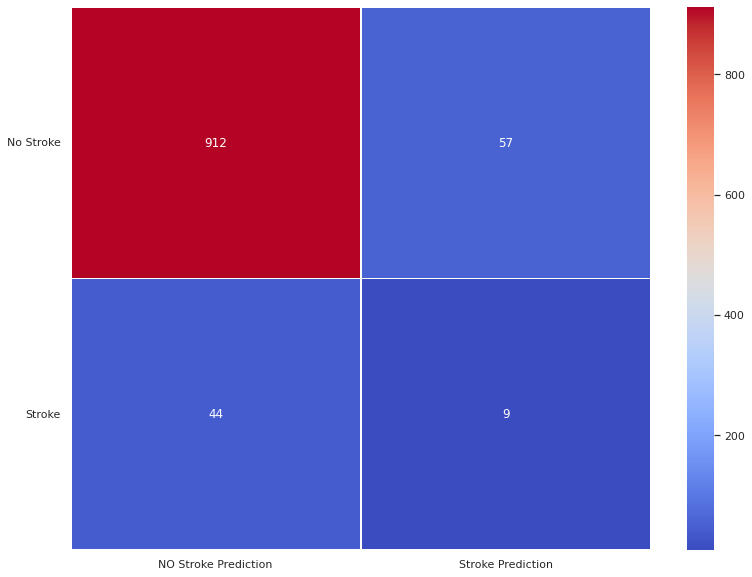

In [68]:
sns.heatmap(rf_conf_matrix, cmap = 'coolwarm', annot = True, fmt = '', linewidths = 1, yticklabels = ['No Stroke', 'Stroke'], xticklabels = ['NO Stroke Prediction', 'Stroke Prediction'])
plt.yticks(rotation = 0)
plt.show()

# XGBoost Model

In [53]:
from xgboost import XGBClassifier

In [54]:
xgb_classifier = XGBClassifier(random_state= 48)

In [55]:
xgb_classifier.fit(x_train_balanced, y_train_balanced)

XGBClassifier(random_state=48)

In [58]:
xgb_train_acc = ((xgb_classifier.score(x_train_balanced, y_train_balanced)) * 100)

In [59]:
xgb_test_acc = ((xgb_classifier.score(x_test, y_test)) * 100)

In [60]:
print("Training Accuracy: ", xgb_train_acc, "%")
print("Test Accuracy: ", xgb_test_acc, "%")

Training Accuracy:  88.60483042137717 %
Test Accuracy:  81.01761252446184 %


In [69]:
xgb_preds = xgb_classifier.predict(x_test)

In [70]:
print(classification_report(y_test, xgb_preds))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       969
           1       0.13      0.45      0.20        53

    accuracy                           0.81      1022
   macro avg       0.55      0.64      0.55      1022
weighted avg       0.92      0.81      0.86      1022



In [71]:
xgb_conf_matrix = confusion_matrix(y_test, xgb_preds)

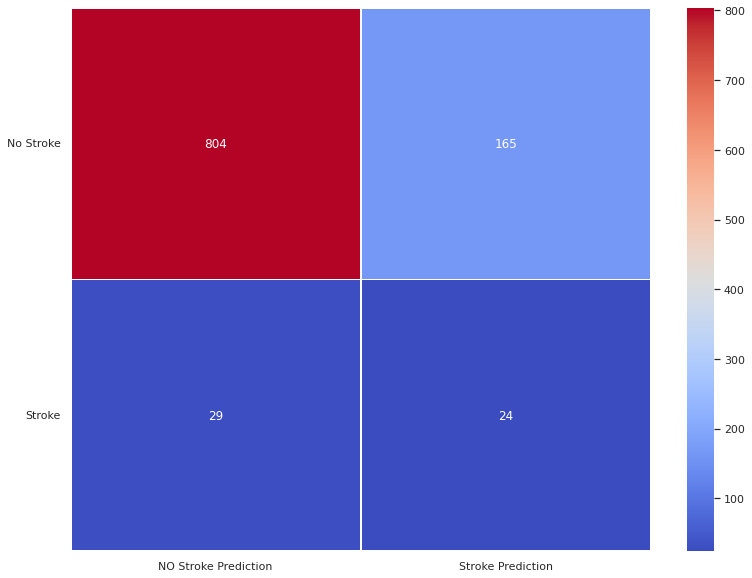

In [72]:
sns.heatmap(xgb_conf_matrix, cmap = 'coolwarm', annot = True, fmt = '', linewidths = 1, yticklabels = ['No Stroke', 'Stroke'], xticklabels = ['NO Stroke Prediction', 'Stroke Prediction'])
plt.yticks(rotation = 0)
plt.show()

# Logistic Regression Model

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
lg = LogisticRegression(random_state = 48)

In [75]:
lg.fit(x_train_balanced, y_train_balanced)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=48)

In [76]:
lg_train_acc = ((lg.score(x_train_balanced, y_train_balanced)) * 100)
lg_test_acc = ((lg.score(x_test, y_test)) * 100)

In [77]:
print("Training Accuracy: ", lg_train_acc, "%")
print("Test Accuracy: ", lg_test_acc, "%")

Training Accuracy:  80.16443987667009 %
Test Accuracy:  76.71232876712328 %


In [78]:
lg_preds = lg.predict(x_test)
print(classification_report(y_test, lg_preds))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86       969
           1       0.13      0.58      0.21        53

    accuracy                           0.77      1022
   macro avg       0.55      0.68      0.54      1022
weighted avg       0.93      0.77      0.83      1022



In [79]:
lg_conf_matrix = confusion_matrix(y_test, lg_preds)

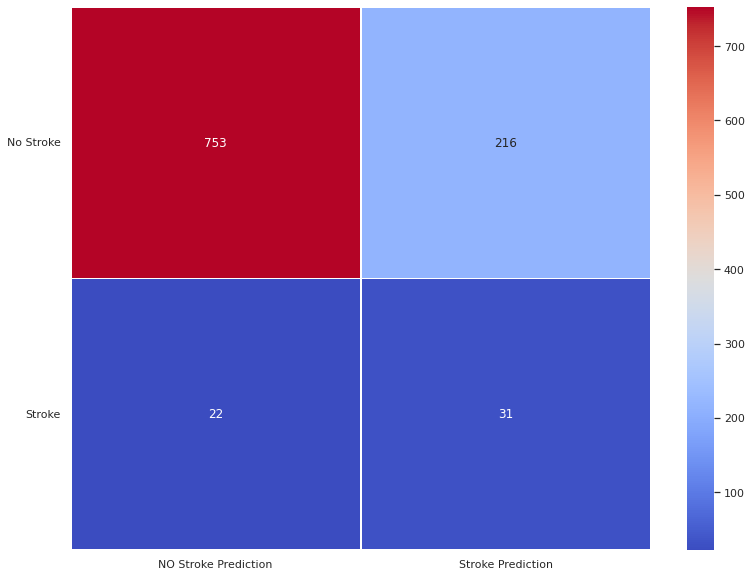

In [80]:
sns.heatmap(lg_conf_matrix, cmap = 'coolwarm', annot = True, fmt = '', linewidths = 1, yticklabels = ['No Stroke', 'Stroke'], xticklabels = ['NO Stroke Prediction', 'Stroke Prediction'])
plt.yticks(rotation = 0)
plt.show()

# SVC (Support Vector Classifier) Model

In [83]:
from sklearn.svm import SVC

In [84]:
svc = SVC(kernel='rbf', probability=True, random_state=48)

In [85]:
svc.fit(x_train_balanced, y_train_balanced)

SVC(probability=True, random_state=48)

In [86]:
svc_train_acc = ((svc.score(x_train_balanced, y_train_balanced)) * 100)
svc_test_acc = ((svc.score(x_test, y_test)) * 100)

In [87]:
print("Training Accuracy: ", svc_train_acc, "%")
print("Test Accuracy: ", svc_test_acc, "%")

Training Accuracy:  77.10688591983555 %
Test Accuracy:  71.62426614481409 %


In [88]:
svc_preds = svc.predict(x_test)
print(classification_report(y_test, svc_preds))

              precision    recall  f1-score   support

           0       0.98      0.71      0.83       969
           1       0.13      0.79      0.22        53

    accuracy                           0.72      1022
   macro avg       0.56      0.75      0.53      1022
weighted avg       0.94      0.72      0.80      1022



In [89]:
svc_conf_matrix = confusion_matrix(y_test, svc_preds)

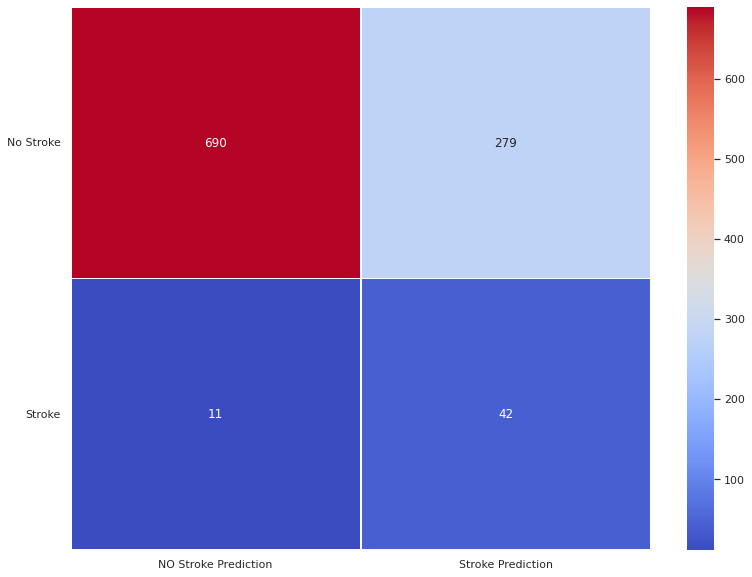

In [90]:
sns.heatmap(svc_conf_matrix, cmap = 'coolwarm', annot = True, fmt = '', linewidths = 1, yticklabels = ['No Stroke', 'Stroke'], xticklabels = ['NO Stroke Prediction', 'Stroke Prediction'])
plt.yticks(rotation = 0)
plt.show()

# KNN (K - Nearest Neighbours) Model

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn_cl = KNeighborsClassifier(n_neighbors = 15, metric='euclidean')

In [97]:
knn_cl.fit(x_train_balanced, y_train_balanced)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [98]:
knn_train_acc = ((knn_cl.score(x_train_balanced, y_train_balanced)) * 100)
knn_test_acc = ((knn_cl.score(x_test, y_test)) * 100)

In [99]:
print("Training Accuracy: ", knn_train_acc, "%")
print("Test Accuracy: ", knn_test_acc, "%")

Training Accuracy:  88.36073997944501 %
Test Accuracy:  75.44031311154599 %


In [100]:
knn_preds = knn_cl.predict(x_test)
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.97      0.76      0.86       969
           1       0.12      0.57      0.19        53

    accuracy                           0.75      1022
   macro avg       0.54      0.67      0.52      1022
weighted avg       0.93      0.75      0.82      1022



In [101]:
knn_conf_matrix = confusion_matrix(y_test, knn_preds)

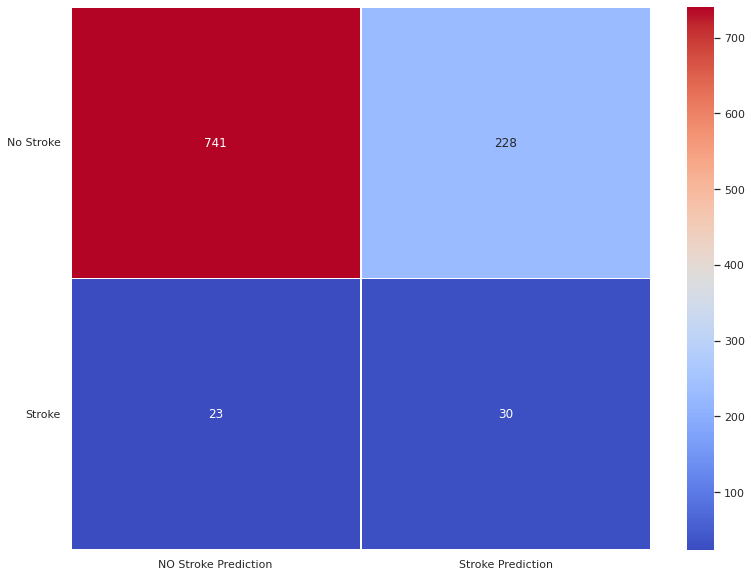

In [102]:
sns.heatmap(knn_conf_matrix, cmap = 'coolwarm', annot = True, fmt = '', linewidths = 1, yticklabels = ['No Stroke', 'Stroke'], xticklabels = ['NO Stroke Prediction', 'Stroke Prediction'])
plt.yticks(rotation = 0)
plt.show()

# XAI - Explaining the models

## Random Forest Explanations

### SHAP

In [ ]:
!pip install shap 

https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

In [105]:
import shap

In [112]:
rf_shap = shap.TreeExplainer(rf_classifier)

In [115]:
x_test.loc[[2961]]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2961,1,55.0,1,1,1,2,0,64.92,32.1,3


In [118]:
y_test.loc[[2961]]

2961    0
Name: stroke, dtype: int64

In [117]:
i = x_test.loc[[2961]]
shap_values = rf_shap.shap_values(i)
shap.initjs()
shap.force_plot(rf_shap.expected_value[1], shap_values[1], i)

In [120]:
x_test.loc[[4012]]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4012,1,36.0,0,0,1,2,1,77.26,30.9,2


In [122]:
y_test.loc[[4012]]

4012    0
Name: stroke, dtype: int64

In [123]:
i = x_test.loc[[4012]]
shap_values = rf_shap.shap_values(i)
shap.initjs()
shap.force_plot(rf_shap.expected_value[1], shap_values[1], i)

In [137]:
x_test.loc[[15]]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
15,0,50.0,1,0,1,3,0,167.41,30.9,2


In [136]:
y_test.loc[[15]]

15    1
Name: stroke, dtype: int64

In [138]:
i = x_test.loc[[15]]
shap_values = rf_shap.shap_values(i)
shap.initjs()
shap.force_plot(rf_shap.expected_value[1], shap_values[1], i)

In [159]:
x_test.loc[[218]]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
218,0,76.0,1,1,1,3,1,199.86,28.893237,3


In [160]:
y_test.loc[[218]]

218    1
Name: stroke, dtype: int64

In [179]:
i = x_test.loc[[218]]
shap_values = rf_shap.shap_values(i)
shap.initjs()
shap.force_plot(rf_shap.expected_value[1], shap_values[1], i)

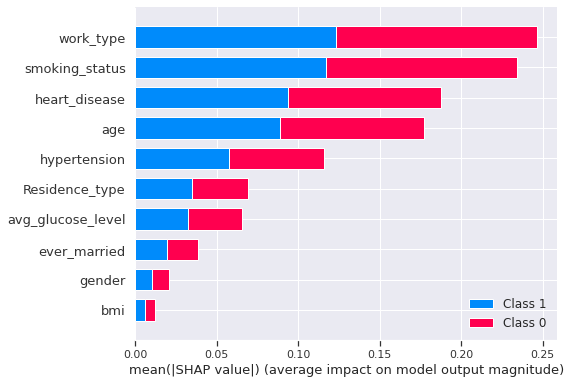

In [164]:
shap.summary_plot(shap_values, x_train)

In [ ]:
shap.dependence_plot("smoking_status", rf_shap_values, X_test)

## XGB Explanations

### SHAP

In [166]:
xgb_shap = shap.TreeExplainer(xgb_classifier)

In [169]:
x_test.loc[[2961]]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2961,1,55.0,1,1,1,2,0,64.92,32.1,3


In [170]:
y_test.loc[[2961]]

2961    0
Name: stroke, dtype: int64

In [181]:
i = x_test.loc[[218]]
xgb_shap_values = xgb_shap.shap_values(i)

In [ ]:
shap.initjs()
shap.force_plot(xgb_shap.expected_value[1], xgb_shap_values[1], i)

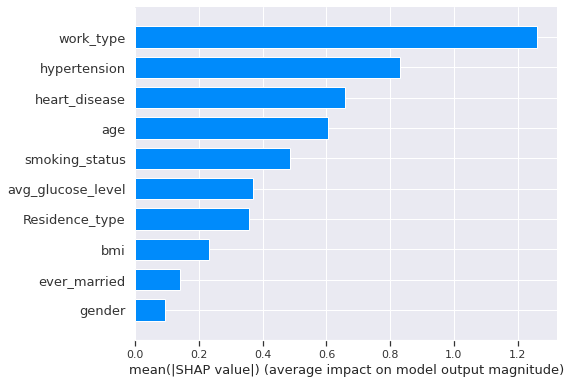

In [183]:
shap.summary_plot(xgb_shap_values, i, plot_type="bar")

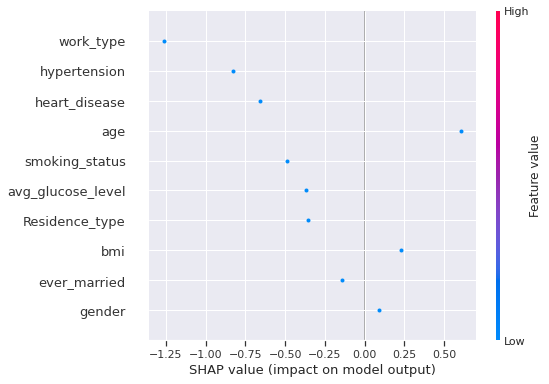

In [186]:
shap.summary_plot(xgb_shap_values, i)

## Logistic Regression Explanations

### SHAP

In [187]:
lg_shap = shap.LinearExplainer(lg, x_train, feature_dependece = "indepedent")

In [188]:
lg_shap_values = lg_shap.shap_values(x_test)

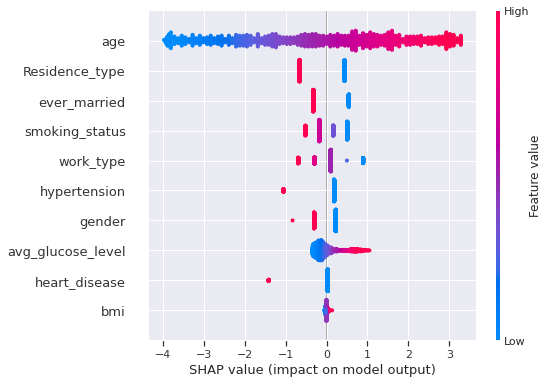

In [189]:
shap.summary_plot(lg_shap_values, x_test)

In [191]:
i = x_test.loc[[2961]]
shap_values = lg_shap.shap_values(i)
shap.initjs()
shap.force_plot(lg_shap.expected_value[1], shap_values[1], i)

IndexError: ignored